# Constructo Wheater

### A ideia é fazer tirar uma média por mês de dias que chovem suficientemente para atraphalhar o andamento da obra, para então prever isso no cronograma. 


### Dados do INMET estação metereológica de Sorocaba-SP - Série Histórica, diária de 01/01/2000 - 17/11/2018

Acho que talvez seja interessante criar as classes: Chovendinho (atrapalha alguns serviços), chovendo (atrapalha alvenaria), chovendão ( obra alagada), Calamidade de chuva, OMG

In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/raw 2 c.csv', sep=';')

In [3]:
df.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83851,01/02/1998,0,NaN,33.5,NaN,6.1,3.0,26.84,84.50,NaN
1,83851,01/02/1998,1200,0.0,NaN,23.5,NaN,NaN,NaN,NaN,NaN
2,83851,02/02/1998,0,NaN,34.1,NaN,7.6,3.9,27.10,73.25,NaN
3,83851,02/02/1998,1200,0.7,NaN,22.0,NaN,NaN,NaN,NaN,NaN
4,83851,03/02/1998,0,NaN,33.5,NaN,6.2,3.4,25.66,70.75,NaN


In [4]:
df.describe()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media
count,13097.0,13097.000000,6559.000000,6516.000000,6499.000000,6516.000000,6440.000000,6504.000000,6503.000000
mean,83851.0,601.603421,3.686416,27.778622,16.687475,6.053161,3.507733,21.204299,74.689374
std,0.0,600.020765,10.510229,4.017201,3.517677,3.380624,1.624978,3.359422,9.683246
min,83851.0,0.000000,0.000000,10.700000,3.200000,0.000000,0.000000,9.100000,38.750000
25%,83851.0,0.000000,0.000000,25.200000,14.200000,3.275000,2.400000,18.840000,69.000000
50%,83851.0,1200.000000,0.000000,28.100000,17.000000,7.000000,3.400000,21.490000,74.750000
75%,83851.0,1200.000000,1.000000,30.800000,19.700000,8.800000,4.400000,23.780000,81.000000
max,83851.0,1200.000000,164.400000,37.800000,25.100000,12.400000,13.900000,29.740000,99.000000


In [64]:
df.tail()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida
13092,83851,22/12/2017,1200,10.6,NaN,20.1,NaN,NaN,NaN,NaN,NaN,2017-12-22
13093,83851,25/12/2017,0,NaN,29.5,NaN,0.6,NaN,23.04,94.0,1,2017-12-25
13094,83851,25/12/2017,1200,0.0,NaN,20.1,NaN,NaN,NaN,NaN,NaN,2017-12-25
13095,83851,26/12/2017,0,NaN,31.1,NaN,4.7,7.6,25.20,77.0,0.5,2017-12-26
13096,83851,26/12/2017,1200,23.6,NaN,19.9,NaN,NaN,NaN,NaN,NaN,2017-12-26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13097 entries, 0 to 13096
Data columns (total 11 columns):
Estacao                      13097 non-null int64
Data                         13097 non-null object
Hora                         13097 non-null int64
Precipitacao                 6559 non-null float64
TempMaxima                   6516 non-null float64
TempMinima                   6499 non-null float64
Insolacao                    6516 non-null float64
Evaporacao Piche             6440 non-null float64
Temp Comp Media              6504 non-null float64
Umidade Relativa Media       6503 non-null float64
Velocidade do Vento Media    5830 non-null object
dtypes: float64(7), int64(2), object(2)
memory usage: 1.1+ MB


In [6]:
df['DataConvertida'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

In [7]:
df.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida
0,83851,01/02/1998,0,NaN,33.5,NaN,6.1,3.0,26.84,84.50,NaN,1998-02-01
1,83851,01/02/1998,1200,0.0,NaN,23.5,NaN,NaN,NaN,NaN,NaN,1998-02-01
2,83851,02/02/1998,0,NaN,34.1,NaN,7.6,3.9,27.10,73.25,NaN,1998-02-02
3,83851,02/02/1998,1200,0.7,NaN,22.0,NaN,NaN,NaN,NaN,NaN,1998-02-02
4,83851,03/02/1998,0,NaN,33.5,NaN,6.2,3.4,25.66,70.75,NaN,1998-02-03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13097 entries, 0 to 13096
Data columns (total 12 columns):
Estacao                      13097 non-null int64
Data                         13097 non-null object
Hora                         13097 non-null int64
Precipitacao                 6559 non-null float64
TempMaxima                   6516 non-null float64
TempMinima                   6499 non-null float64
Insolacao                    6516 non-null float64
Evaporacao Piche             6440 non-null float64
Temp Comp Media              6504 non-null float64
Umidade Relativa Media       6503 non-null float64
Velocidade do Vento Media    5830 non-null object
DataConvertida               13097 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 1.2+ MB


In [9]:
#--Corrigindo TempMinima e Precipitacao
#Splita rows por hora em 2 dataframes
dfTemp12 = df[df.Hora == 1200]
dfTemp00 = df[df.Hora == 0]

#Imprime dimensoes de ambos subsets e do dataset completo
print("dfTemp00.shape: "+str(dfTemp00.shape)+
      "\ndfTemp12.shape: "+str(dfTemp12.shape)+
      "\ndf.shape: "+str(df.shape)
     )

dfTemp00.shape: (6531, 12)
dfTemp12.shape: (6566, 12)
df.shape: (13097, 12)


In [10]:
#Define chaves para join
dfTemp00['chave'] = dfTemp00["Estacao"].map(str) + dfTemp00["Data"].map(str)
dfTemp12['chave'] = dfTemp12["Estacao"].map(str) + dfTemp12["Data"].map(str)

#Evidencia variaveis TemMinima e Precipitacao deletando demais colunas
dfTemp12.drop(dfTemp12.columns[[0,1,2,4,6,7,8,9,10]], axis=1, inplace=True)
dfTemp12.head()

D:\anaconda\envs\tera-jul2018\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\envs\tera-jul2018\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\tera-jul2018\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

,Precipitacao,TempMinima,DataConvertida,chave
1,0.0,23.5,1998-02-01,8385101/02/1998
3,0.7,22.0,1998-02-02,8385102/02/1998
5,0.0,22.0,1998-02-03,8385103/02/1998
7,0.0,20.5,1998-02-04,8385104/02/1998
9,0.0,21.0,1998-02-05,8385105/02/1998


In [11]:
#Faz o join
df_j = dfTemp00.set_index('chave').join(dfTemp12.set_index('chave'), lsuffix='_00', rsuffix='_12')
# dfEstCamposJoined["TempMinima_00"].mean()
df_j["TempMinima_12"].mean()

16.687474996153252

In [12]:
df_j.head()

,Estacao,Data,Hora,Precipitacao_00,TempMaxima,TempMinima_00,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida_00,Precipitacao_12,TempMinima_12,DataConvertida_12
chave,,,,,,,,,,,,,,,
8385101/02/1998,83851,01/02/1998,0,NaN,33.5,NaN,6.1,3.0,26.84,84.50,NaN,1998-02-01,0.0,23.5,1998-02-01
8385102/02/1998,83851,02/02/1998,0,NaN,34.1,NaN,7.6,3.9,27.10,73.25,NaN,1998-02-02,0.7,22.0,1998-02-02
8385103/02/1998,83851,03/02/1998,0,NaN,33.5,NaN,6.2,3.4,25.66,70.75,NaN,1998-02-03,0.0,22.0,1998-02-03
8385104/02/1998,83851,04/02/1998,0,NaN,34.1,NaN,6.1,3.9,26.16,70.25,NaN,1998-02-04,0.0,20.5,1998-02-04
8385105/02/1998,83851,05/02/1998,0,NaN,34.5,NaN,8.6,3.7,25.62,76.75,NaN,1998-02-05,0.0,21.0,1998-02-05


In [13]:
#Cria novas variaveis TempMinima e Precipitacao
df_j["TempMinima"] = df_j["TempMinima_12"]
df_j["Precipitacao"] = df_j["Precipitacao_12"]

#Remove colunas temporarias para o join
df_j.drop('TempMinima_00', axis=1, inplace=True)
df_j.drop('TempMinima_12', axis=1, inplace=True)
df_j.drop('Precipitacao_00', axis=1, inplace=True)
df_j.drop('Precipitacao_12', axis=1, inplace=True)

#Reseta o index
df_j = df_j.reset_index(drop=True)

#Renomeia dataframe corrigido
df_j = df_j
df_j.head()
# dfEstCamposCorrigido.tail()

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida_00,DataConvertida_12,TempMinima,Precipitacao
0,83851,01/02/1998,0,33.5,6.1,3.0,26.84,84.50,NaN,1998-02-01,1998-02-01,23.5,0.0
1,83851,02/02/1998,0,34.1,7.6,3.9,27.10,73.25,NaN,1998-02-02,1998-02-02,22.0,0.7
2,83851,03/02/1998,0,33.5,6.2,3.4,25.66,70.75,NaN,1998-02-03,1998-02-03,22.0,0.0
3,83851,04/02/1998,0,34.1,6.1,3.9,26.16,70.25,NaN,1998-02-04,1998-02-04,20.5,0.0
4,83851,05/02/1998,0,34.5,8.6,3.7,25.62,76.75,NaN,1998-02-05,1998-02-05,21.0,0.0


In [14]:
df_j.isnull().sum()

Estacao                        0
Data                           0
Hora                           0
TempMaxima                    15
Insolacao                     15
Evaporacao Piche              91
Temp Comp Media               27
Umidade Relativa Media        28
Velocidade do Vento Media    701
DataConvertida_00              0
DataConvertida_12              1
TempMinima                    32
Precipitacao                   8
dtype: int64

In [15]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 13 columns):
Estacao                      6531 non-null int64
Data                         6531 non-null object
Hora                         6531 non-null int64
TempMaxima                   6516 non-null float64
Insolacao                    6516 non-null float64
Evaporacao Piche             6440 non-null float64
Temp Comp Media              6504 non-null float64
Umidade Relativa Media       6503 non-null float64
Velocidade do Vento Media    5830 non-null object
DataConvertida_00            6531 non-null datetime64[ns]
DataConvertida_12            6530 non-null datetime64[ns]
TempMinima                   6499 non-null float64
Precipitacao                 6523 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 663.4+ KB


In [16]:
df_j.isnull().sum()/len(df_j)

Estacao                      0.000000
Data                         0.000000
Hora                         0.000000
TempMaxima                   0.002297
Insolacao                    0.002297
Evaporacao Piche             0.013934
Temp Comp Media              0.004134
Umidade Relativa Media       0.004287
Velocidade do Vento Media    0.107334
DataConvertida_00            0.000000
DataConvertida_12            0.000153
TempMinima                   0.004900
Precipitacao                 0.001225
dtype: float64

In [17]:
df_j.median()

Estacao                   83851.00
Hora                          0.00
TempMaxima                   28.10
Insolacao                     7.00
Evaporacao Piche              3.40
Temp Comp Media              21.49
Umidade Relativa Media       74.75
TempMinima                   17.00
Precipitacao                  0.00
dtype: float64

In [18]:
df_j['TempMaxima']=df_j['TempMaxima'].fillna(value=28.10)
df_j['Insolacao']=df_j['Insolacao'].fillna(value=7.0)
df_j['Evaporacao Piche']=df_j['Evaporacao Piche'].fillna(value=3.4)
df_j['Umidade Relativa Media']=df_j['Umidade Relativa Media'].fillna(value=74.75)
df_j['TempMinima']=df_j['TempMinima'].fillna(value=17.00)
df_j['Precipitacao']=df_j['Precipitacao'].fillna(value=0.00)
df_j['Temp Comp Media']=df_j['Temp Comp Media'].fillna(value=21.49)

In [19]:
df_j.isnull().sum()/len(df_j)

Estacao                      0.000000
Data                         0.000000
Hora                         0.000000
TempMaxima                   0.000000
Insolacao                    0.000000
Evaporacao Piche             0.000000
Temp Comp Media              0.000000
Umidade Relativa Media       0.000000
Velocidade do Vento Media    0.107334
DataConvertida_00            0.000000
DataConvertida_12            0.000153
TempMinima                   0.000000
Precipitacao                 0.000000
dtype: float64

In [20]:
df_j['mes'] = pd.DatetimeIndex(df_j['DataConvertida_00']).month

In [21]:
df_j.head()

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida_00,DataConvertida_12,TempMinima,Precipitacao,mes
0,83851,01/02/1998,0,33.5,6.1,3.0,26.84,84.50,NaN,1998-02-01,1998-02-01,23.5,0.0,2
1,83851,02/02/1998,0,34.1,7.6,3.9,27.10,73.25,NaN,1998-02-02,1998-02-02,22.0,0.7,2
2,83851,03/02/1998,0,33.5,6.2,3.4,25.66,70.75,NaN,1998-02-03,1998-02-03,22.0,0.0,2
3,83851,04/02/1998,0,34.1,6.1,3.9,26.16,70.25,NaN,1998-02-04,1998-02-04,20.5,0.0,2
4,83851,05/02/1998,0,34.5,8.6,3.7,25.62,76.75,NaN,1998-02-05,1998-02-05,21.0,0.0,2


In [22]:
df_j['mes'][:200]

0      2
1      2
2      2
3      2
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     3
29     3
      ..
170    7
171    7
172    7
173    7
174    7
175    7
176    7
177    7
178    7
179    7
180    7
181    8
182    8
183    8
184    8
185    8
186    8
187    8
188    8
189    8
190    8
191    8
192    8
193    8
194    8
195    8
196    8
197    8
198    8
199    8
Name: mes, Length: 200, dtype: int64

In [23]:
df_j['Precipitacao'][df_j['mes']==4].median()

0.0

In [24]:
df_j['Precipitacao'][1]

0.69999999999999996

In [72]:
#Sem chuva 0.0 À 3.00 mm
# Chovendinho 3.00 mm à 5.00 mm
# Chovendo 5.00 à 10 mm
# Chuvão 10 à 20 mm
# Catastrofe 20 <
cl_chuva = []
for i in range (len(df_j)):
    if df_j['Precipitacao'][i] <3:
        chuva = 'Sem chuva'
    elif df_j['Precipitacao'][i] <5:
        chuva = 'chovendinho'
    elif df_j['Precipitacao'][i] <10:
        chuva = 'chovendo'
    elif df_j['Precipitacao'][i] <20:
        chuva = 'Chuvao'
    else:
        chuva = 'Catastrofe'
    cl_chuva.append(chuva)

In [77]:
#Sem chuva 0.0 À 3.00 mm
# Chovendinho 3.00 mm à 5.00 mm
# Chovendo 5.00 à 10 mm
# Chuvão 10 à 20 mm
# Catastrofe 20 <
cl_chuva2 = []
for i in range (len(df_j)):
    if df_j['Precipitacao'][i] <3:
        chuva2 = 0
    elif df_j['Precipitacao'][i] <5:
        chuva2 = 1
    elif df_j['Precipitacao'][i] <10:
        chuva2 = 2
    elif df_j['Precipitacao'][i] <20:
        chuva2 = 3
    else:
        chuva2 = 4
    cl_chuva2.append(chuva2)

In [78]:
df_j['CL']=cl_chuva

In [80]:
df_j['CL 2']=cl_chuva2

In [81]:
df_j[:8]

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida_00,DataConvertida_12,TempMinima,Precipitacao,mes,CL,CL 2
0,83851,01/02/1998,0,33.5,6.1,3.0,26.84,84.50,NaN,1998-02-01,1998-02-01,23.5,0.0,2,Sem chuva,0
1,83851,02/02/1998,0,34.1,7.6,3.9,27.10,73.25,NaN,1998-02-02,1998-02-02,22.0,0.7,2,Sem chuva,0
2,83851,03/02/1998,0,33.5,6.2,3.4,25.66,70.75,NaN,1998-02-03,1998-02-03,22.0,0.0,2,Sem chuva,0
3,83851,04/02/1998,0,34.1,6.1,3.9,26.16,70.25,NaN,1998-02-04,1998-02-04,20.5,0.0,2,Sem chuva,0
4,83851,05/02/1998,0,34.5,8.6,3.7,25.62,76.75,NaN,1998-02-05,1998-02-05,21.0,0.0,2,Sem chuva,0
5,83851,06/02/1998,0,32.1,3.5,2.7,25.72,79.50,NaN,1998-02-06,1998-02-06,21.5,6.8,2,chovendo,2
6,83851,07/02/1998,0,33.3,5.7,3.8,26.60,75.75,NaN,1998-02-07,1998-02-07,21.5,0.0,2,Sem chuva,0
7,83851,08/02/1998,0,32.8,0.3,2.6,26.20,81.75,NaN,1998-02-08,1998-02-08,23.0,0.0,2,Sem chuva,0


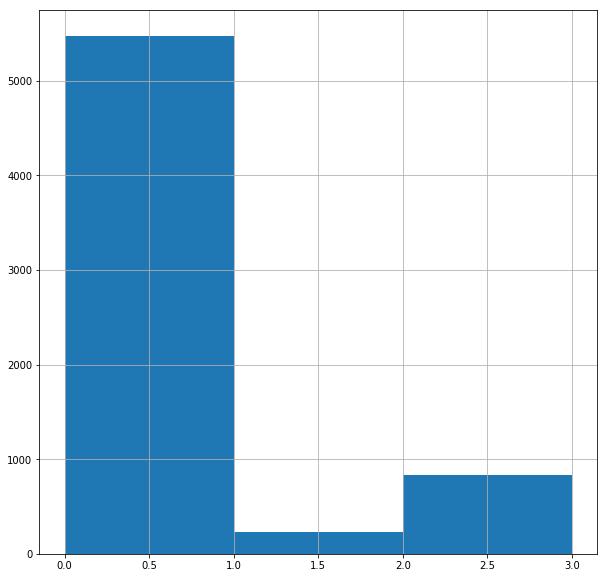

In [48]:
df_j['CL 2'].hist(bins=3, figsize= (10,10))

In [82]:
df_j[df_j['Precipitacao']>1.0]

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida_00,DataConvertida_12,TempMinima,Precipitacao,mes,CL,CL 2
5,83851,06/02/1998,0,32.1,3.5,2.7,25.72,79.50,NaN,1998-02-06,1998-02-06,21.5,6.8,2,chovendo,2
8,83851,09/02/1998,0,31.5,3.9,2.1,25.90,78.25,NaN,1998-02-09,1998-02-09,22.0,3.7,2,chovendinho,1
10,83851,11/02/1998,0,24.4,0.0,0.8,21.88,81.75,NaN,1998-02-11,1998-02-11,20.0,19.8,2,Chuvao,3
11,83851,12/02/1998,0,22.6,0.0,2.1,19.76,82.50,NaN,1998-02-12,1998-02-12,18.0,5.0,2,chovendo,2
12,83851,13/02/1998,0,20.7,7.0,1.1,19.50,90.25,NaN,1998-02-13,1998-02-13,18.0,17.8,2,Chuvao,3
13,83851,14/02/1998,0,28.2,2.9,1.2,22.36,81.25,NaN,1998-02-14,1998-02-14,19.0,8.1,2,chovendo,2
14,83851,15/02/1998,0,28.0,0.0,1.3,23.00,88.25,NaN,1998-02-15,1998-02-15,19.2,7.0,2,chovendo,2
15,83851,16/02/1998,0,24.5,0.0,0.7,21.54,91.25,NaN,1998-02-16,1998-02-16,19.0,20.7,2,Catastrofe,4
16,83851,17/02/1998,0,29.4,8.3,2.9,22.48,74.75,NaN,1998-02-17,1998-02-17,19.0,10.5,2,Chuvao,3
18,83851,19/02/1998,0,33.4,9.4,4.1,26.26,68.00,NaN,1998-02-19,1998-02-19,19.5,1.2,2,Sem chuva,0


In [65]:
df_j.tail()

,Estacao,Data,Hora,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,DataConvertida_00,DataConvertida_12,TempMinima,Precipitacao,mes,CL,CL 2
6526,83851,20/12/2017,0,32.4,3.7,3.4,24.04,84.0,0,2017-12-20,2017-12-20,18.6,104.2,12,cCatastrofe,0
6527,83851,21/12/2017,0,22.5,0.0,3.0,21.16,95.0,0,2017-12-21,2017-12-21,20.3,2.8,12,Sem chuva,0
6528,83851,22/12/2017,0,22.8,0.7,0.9,21.06,95.0,0.5,2017-12-22,2017-12-22,20.1,10.6,12,Chuvao,3
6529,83851,25/12/2017,0,29.5,0.6,3.4,23.04,94.0,1,2017-12-25,2017-12-25,20.1,0.0,12,Sem chuva,0
6530,83851,26/12/2017,0,31.1,4.7,7.6,25.20,77.0,0.5,2017-12-26,2017-12-26,19.9,23.6,12,cCatastrofe,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000192BC208>]], dtype=object)

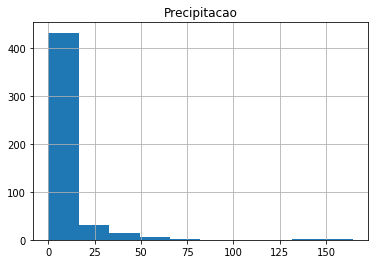

In [83]:
df_j[df_j['mes']==2].hist('Precipitacao')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A550908>]], dtype=object)

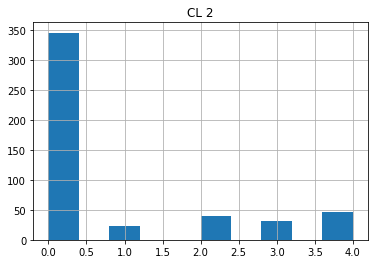

In [88]:
df_j[df_j['mes']==2].hist('CL 2',)

In [91]:
df_j.plot(x='mes', y='CL 2')

KeyError: 'CL 2'